In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
max_eff = 17.66

### Import BO Benchmark Runs

In [188]:
df = pd.read_excel("BO_benchmark_LHS20_20210701.xls")
df_BO_reg = df.iloc[:,1:]
df_BO_reg

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,8.848130,6.525025,7.799381,4.819411,12.973541,2.654756,13.342042,11.907091,8.744083,9.939074,...,12.007435,14.234549,8.508182,12.841791,10.748608,12.155543,11.104712,11.457757,6.808186,4.113615
1,10.868601,9.998367,8.929009,6.595080,3.678022,5.080511,6.443271,15.308762,4.179381,11.870304,...,6.662359,7.148079,15.505921,12.671246,13.739421,13.233798,8.459586,6.905395,9.001451,10.200558
2,8.156831,2.483157,8.539529,8.082802,8.247689,9.068448,6.831286,11.146754,14.624589,5.340498,...,13.283565,6.313608,13.060626,6.253361,10.222905,10.799656,8.374237,9.840336,8.796335,13.225021
3,8.600509,10.645571,4.553520,6.249792,12.385699,14.362883,8.338098,7.612341,12.043494,14.573578,...,4.841438,14.150776,11.668101,4.300886,10.594810,9.787485,7.493695,9.097635,12.799409,7.989831
4,11.531658,7.537909,3.465397,14.063751,5.589998,9.863787,11.085158,5.443830,9.405408,13.799671,...,11.352238,7.900701,7.670374,13.311156,8.410649,10.967391,12.088198,6.729435,12.516972,5.977811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,17.612124,15.974337,14.718313,16.331418,16.644047,14.403627,14.064095,16.635652,17.197191,16.514464,...,10.938396,14.022257,16.149819,16.018137,16.507817,16.356284,17.383345,17.628210,17.308791,16.587076
316,17.257745,15.157951,13.463506,16.648103,16.694721,14.450417,13.591557,16.335868,17.182147,17.354872,...,16.106041,15.334390,12.894480,16.997917,16.277274,16.358520,17.378803,14.555372,17.315557,16.495757
317,17.630717,15.112453,13.985306,16.219671,15.929941,14.301178,14.170623,16.134708,17.183145,17.361638,...,14.971377,14.440594,15.811585,14.964712,14.325264,16.366782,17.339261,17.318345,17.251423,15.784114
318,17.657805,13.063723,13.916097,16.562304,14.759177,15.365900,13.979067,16.273938,17.255599,15.694275,...,16.105167,16.580807,16.141536,16.650659,16.206674,16.325637,16.635652,17.525329,14.304751,16.500179


In [189]:
df = pd.read_excel("BO_benchmark_withCons_20210706.xls")
df_BO_wInitCons = df.iloc[:,1:]
df_BO_wInitCons

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,12.201313,13.712693,11.153217,5.315065,13.897195,8.642663,13.870527,10.115736,7.881224,14.385108,...,13.961634,11.132174,7.600625,12.777020,7.374387,4.522811,11.504819,13.227543,9.333193,10.805489
1,14.768887,11.912765,10.931192,11.576504,11.527293,14.743358,5.875440,10.283527,13.669702,13.759609,...,13.920017,2.479230,10.904189,10.595799,14.797669,5.959077,8.400101,12.550235,12.464646,7.590834
2,10.925900,8.929510,7.420144,12.617804,12.304849,14.837630,10.638832,11.638425,12.372296,6.380983,...,12.431174,12.802678,12.025858,13.164217,9.094525,14.664594,12.753490,10.774727,6.799989,6.341148
3,10.071057,12.746888,11.692451,12.871158,3.731238,11.575294,8.953690,11.192504,7.830566,10.599334,...,10.323818,9.142101,11.396626,10.387514,10.345998,11.128913,14.682839,8.871889,10.651820,9.893626
4,11.964811,12.497708,12.419053,7.878981,13.680428,9.985023,12.251304,3.750979,10.439803,12.960628,...,7.266182,10.452032,10.363064,12.173876,11.313885,7.969186,10.882195,14.225626,11.898051,3.865538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,16.320477,14.096039,14.728757,13.095329,13.513446,14.631667,16.867896,14.999075,14.711052,14.377565,...,16.903458,16.565423,13.073207,16.830702,16.580180,14.895613,15.987435,16.712647,16.648933,15.571051
296,16.310004,11.548266,13.443018,16.008065,13.339060,17.085176,16.349990,15.179094,16.681261,16.656339,...,16.851066,17.246217,15.585917,14.875546,14.661950,15.174374,15.057458,17.482237,15.843420,17.636641
297,17.377924,15.586021,14.801733,15.952864,15.832643,15.180576,17.373603,14.751258,16.664037,15.638990,...,17.011750,15.229559,15.559685,15.984523,15.609714,14.896299,15.971861,16.743088,16.018675,17.634022
298,16.837101,14.136975,15.022716,15.690651,15.595892,17.135905,17.370880,13.978107,16.664037,16.649753,...,15.103071,14.794877,15.208728,15.320246,15.252657,15.890911,15.304745,17.427475,16.169973,17.663877


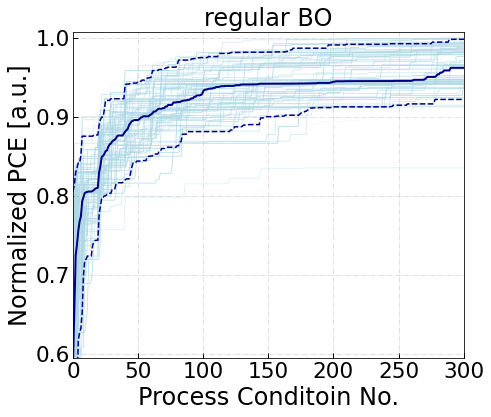

In [263]:
BO_list = np.transpose(df_BO_reg.values)
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in BO_list:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc)),eff_max_acc/max_eff, alpha = 0.8*i/len(BO_list)+0.4, c = 'lightblue', linewidth=0.75)
    eff_max_runlist.append(eff_max_acc/max_eff)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 95, axis = 0)
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
line_5perc = np.percentile(eff_max_runlist, 5, axis = 0)

ax.plot(line_95perc,'--', c = 'navy', linewidth=1.5)
ax.plot(line_median,'-', c = 'navy', linewidth=2)
ax.plot(line_5perc,'--', c = 'navy', linewidth=1.5)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(10.5/max_eff,17.8/max_eff)
axes.set_xlim(0,300)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE [a.u.]', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
axes.set_title('regular BO', fontsize = fs)
plt.show()

BO_reg_5perc, BO_reg_50perc, BO_reg_95perc= [line_5perc, line_median, line_95perc]

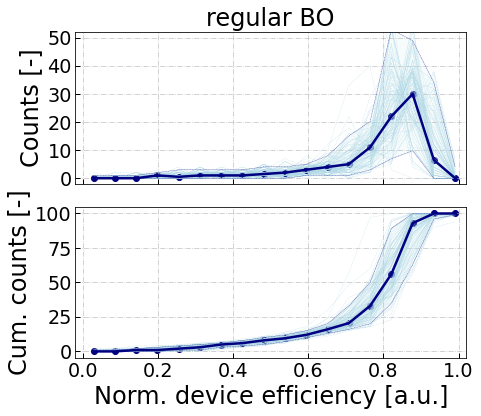

In [425]:
eff_seq_list = BO_list
cum_list = []
cnt_list = []
effmax_seq_list = []
eff_bins =  np.arange(19)
for seq_i in np.arange(len(eff_seq_list)):
    eff_seq= eff_seq_list[seq_i][:100]
    effmax_seq = np.maximum.accumulate(eff_seq)

    eff_sorted = np.sort(eff_seq)
    cnts, bins = np.histogram(eff_sorted, bins=eff_bins)
    cum_cnts = np.cumsum(cnts)
    x = bins[:-1]+0.5
    y_cnt = cnts#/cum_cnts[-1]
    y_cum = cum_cnts#/cum_cnts[-1]
    cnt_list.append(y_cnt)
    cum_list.append(y_cum)
    effmax_seq_list.append(effmax_seq)
    
effmax_seq_95perc = np.quantile(effmax_seq_list, 0.95, axis = 0)
effmax_seq_5perc = np.quantile(effmax_seq_list, 0.05, axis = 0)
effmax_seq_median = np.median(effmax_seq_list, axis = 0)

distr_95perc = np.quantile(cnt_list, 0.95, axis = 0)
distr_5perc = np.quantile(cnt_list, 0.05, axis = 0)
distr_median= np.median(cnt_list, axis = 0)

cum_distr_95perc = np.quantile(cum_list, 0.95, axis = 0)
cum_distr_5perc = np.quantile(cum_list, 0.05, axis = 0)
cum_distr_median = np.median(cum_list, axis = 0)

BO_hist100_5perc, BO_hist100_50perc, BO_hist100_95perc= [distr_5perc, distr_median, distr_95perc]
BO_cum100_5perc, BO_cum100_50perc, BO_cum100_95perc= [cum_distr_5perc, cum_distr_median, cum_distr_95perc]

x_norm = x/max_eff
fig,axes = plt.subplots(2, 1, figsize=(7, 5*1.2), sharex = True)
fs = 24
ax = axes[0]
for cnt_i in cnt_list:
    ax.plot(x_norm, cnt_i, '--', linewidth = 0.3, alpha = 1*i/len(cnt_list)+0.9, color = 'lightblue') 

ax.plot(x_norm, distr_median, '-', color = 'navy', linewidth = 2.5, label = 'reg. BO') 
ax.scatter(x_norm, distr_median, color = 'navy') 
ax.plot(x_norm, distr_95perc, '--', color = 'navy', linewidth = 0.3) 
ax.plot(x_norm, distr_5perc, '--', color = 'navy', linewidth = 0.3) 
ax.fill_between(x_norm, distr_5perc, distr_95perc, alpha = 0.1, color = 'lightblue')
#ax.plot(np.ones(100)*0.95, np.linspace(0,51,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Counts [-]', fontsize = fs)
ax.set_ylim(-0.02*100, 0.52*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)
ax.set_title('regular BO', fontsize = fs)

ax = axes[1]
for cum_i in  cum_list:
    ax.plot(x_norm, cum_i, '--', linewidth = 0.3, alpha = 1*i/len(cum_list)+0.9, color = 'lightblue') 

ax.plot(x_norm, cum_distr_median, '-', color = 'navy', linewidth = 2.5, label = 'reg. BO')
ax.scatter(x_norm, cum_distr_median, color = 'navy') 
ax.plot(x_norm, cum_distr_95perc, '--', color = 'navy', linewidth = 0.3) 
ax.plot(x_norm, cum_distr_5perc, '--', color = 'navy', linewidth = 0.3) 
ax.fill_between(x_norm, cum_distr_5perc, cum_distr_95perc, alpha = 0.1, color = 'lightblue')
#ax.plot(np.ones(100)*15/norm_factor, np.linspace(0, 2,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Cum. counts [-]', fontsize = fs)
ax.set_xlabel('Norm. device efficiency [a.u.]', fontsize = fs)
ax.set_yticks(np.arange(6)*25)
ax.set_ylim(-0.05*100, 1.05*100)
ax.set_xlim(-0.02, 1.02)
#ax.legend(bbox_to_anchor=(0.08, 1.2, 0.5, 0.9), fontsize = fs*0.8)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.7)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.15)
plt.show()


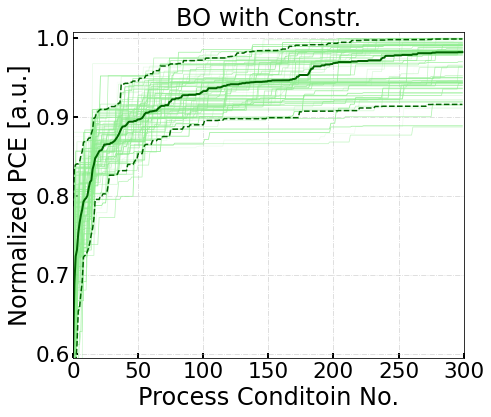

In [290]:
BO_cons_list = np.transpose(df_BO_wInitCons.values)
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in BO_cons_list:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc)),eff_max_acc/max_eff, alpha = 1*i/len(BO_cons_list)+0.6, c = 'lightgreen', linewidth=0.75)
    eff_max_runlist.append(eff_max_acc/max_eff)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 95, axis = 0)
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
line_5perc = np.percentile(eff_max_runlist, 5, axis = 0)

ax.plot(line_95perc,'--', c = 'darkgreen', linewidth=1.5)
ax.plot(line_median,'-', c = 'darkgreen', linewidth=2)
ax.plot(line_5perc,'--', c = 'darkgreen', linewidth=1.5)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(10.5/max_eff,17.8/max_eff)
axes.set_xlim(0,300)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE [a.u.]', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
axes.set_title('BO with Constr.', fontsize = fs)
plt.show()

BO_wInitCons_5perc, BO_wInitCons_50perc, BO_wInitCons_95perc= [line_5perc, line_median, line_95perc]

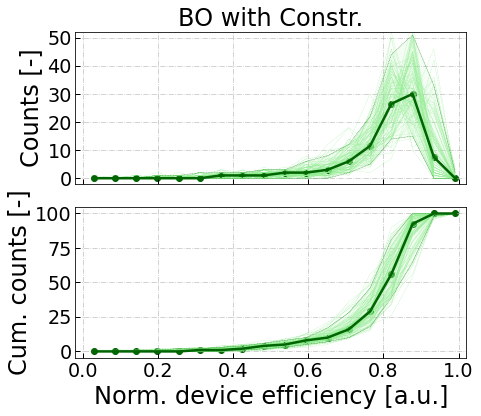

In [426]:
eff_seq_list = BO_cons_list
cum_list = []
cnt_list = []
effmax_seq_list = []
eff_bins =  np.arange(19)

for seq_i in np.arange(len(eff_seq_list)):
    eff_seq= eff_seq_list[seq_i][:100]
    effmax_seq = np.maximum.accumulate(eff_seq)

    eff_sorted = np.sort(eff_seq)
    cnts, bins = np.histogram(eff_sorted, bins=eff_bins)
    cum_cnts = np.cumsum(cnts)
    x = bins[:-1]+0.5
    y_cnt = cnts#/cum_cnts[-1]
    y_cum = cum_cnts#/cum_cnts[-1]
    cnt_list.append(y_cnt)
    cum_list.append(y_cum)
    effmax_seq_list.append(effmax_seq)
    
effmax_seq_95perc = np.quantile(effmax_seq_list, 0.95, axis = 0)
effmax_seq_5perc = np.quantile(effmax_seq_list, 0.05, axis = 0)
effmax_seq_median = np.median(effmax_seq_list, axis = 0)

distr_95perc = np.quantile(cnt_list, 0.95, axis = 0)
distr_5perc = np.quantile(cnt_list, 0.05, axis = 0)
distr_median= np.median(cnt_list, axis = 0)

cum_distr_95perc = np.quantile(cum_list, 0.95, axis = 0)
cum_distr_5perc = np.quantile(cum_list, 0.05, axis = 0)
cum_distr_median = np.median(cum_list, axis = 0)

BOwCons_hist100_5perc, BOwCons_hist100_50perc, BOwCons_hist100_95perc= [distr_5perc, distr_median, distr_95perc]
BOwCons_cum100_5perc, BOwCons_cum100_50perc, BOwCons_cum100_95perc= [cum_distr_5perc, cum_distr_median, cum_distr_95perc]

x_norm = x/max_eff
fig,axes = plt.subplots(2, 1, figsize=(7, 5*1.2), sharex = True)
fs = 24
ax = axes[0]
for cnt_i in cnt_list:
    ax.plot(x_norm, cnt_i, '--', linewidth = 0.3, alpha = 1*i/len(cnt_list)+0.9, color = 'lightgreen') 

ax.plot(x_norm, distr_median, '-', color = 'darkgreen', linewidth = 2.5, label = 'BO w. Cons') 
ax.scatter(x_norm, distr_median, color = 'darkgreen') 
ax.plot(x_norm, distr_95perc, '--', color = 'darkgreen', linewidth = 0.3) 
ax.plot(x_norm, distr_5perc, '--', color = 'darkgreen', linewidth = 0.3) 
ax.fill_between(x_norm, distr_5perc, distr_95perc, alpha = 0.1, color = 'lightgreen')
#ax.plot(np.ones(100)*0.95, np.linspace(0,51,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Counts [-]', fontsize = fs)
ax.set_ylim(-0.02*100, 0.52*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)
ax.set_title('BO with Constr.', fontsize = fs)

ax = axes[1]
for cum_i in cum_list:
    ax.plot(x_norm, cum_i, '--', linewidth = 0.3, alpha = 1*i/len(cum_list)+0.9, color = 'lightgreen') 

ax.plot(x_norm, cum_distr_median, '-', color = 'darkgreen', linewidth = 2.5, label = 'BO w. Cons')
ax.scatter(x_norm, cum_distr_median, color = 'darkgreen') 
ax.plot(x_norm, cum_distr_95perc, '--', color = 'darkgreen', linewidth = 0.3) 
ax.plot(x_norm, cum_distr_5perc, '--', color = 'darkgreen', linewidth = 0.3) 
ax.fill_between(x_norm, cum_distr_5perc, cum_distr_95perc, alpha = 0.1, color = 'lightgreen')
#ax.plot(np.ones(100)*15/norm_factor, np.linspace(0, 2,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Cum. counts [-]', fontsize = fs)
ax.set_xlabel('Norm. device efficiency [a.u.]', fontsize = fs)
ax.set_yticks(np.arange(6)*25)
ax.set_ylim(-0.05*100, 1.05*100)
ax.set_xlim(-0.02, 1.02)
#ax.legend(bbox_to_anchor=(0.08, 1.2, 0.5, 0.9), fontsize = fs*0.8)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.7)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.15)
plt.show()


### Import LHS Benchmark Runs

In [292]:
df = pd.read_excel("LHS_benckmark_20210701.xls")
df_LHS_full = df.iloc[:,1:]
df_LHS_full

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,9.30,5.75,13.07,12.49,8.06,5.76,6.97,2.37,6.51,14.76,...,7.77,9.55,8.20,12.48,13.39,15.44,2.22,6.93,2.25,10.02
1,7.88,6.42,7.80,12.53,6.30,8.38,12.96,8.37,11.15,10.50,...,6.81,9.39,12.87,9.30,9.63,10.36,14.49,3.71,4.02,14.32
2,11.95,5.32,3.47,13.85,10.79,9.10,9.62,6.23,9.58,9.10,...,12.79,12.77,8.50,9.09,11.63,7.84,12.27,14.44,10.28,10.73
3,10.40,7.07,6.64,6.67,15.04,6.11,12.47,8.91,12.29,7.92,...,6.72,8.73,9.53,6.95,6.40,12.40,12.53,1.98,2.19,7.21
4,14.67,10.91,5.25,5.45,12.71,7.73,11.60,11.55,12.25,11.16,...,9.47,3.50,11.54,10.00,12.78,10.95,2.77,13.98,5.45,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10.68,10.61,9.11,5.56,15.03,12.08,8.30,9.71,8.80,12.98,...,10.56,5.81,8.66,8.98,3.00,11.55,11.73,13.70,13.16,14.01
296,14.10,12.76,11.61,10.88,4.95,11.51,13.58,4.98,9.19,4.66,...,13.10,13.31,5.18,8.85,12.27,13.18,8.52,10.57,1.54,11.36
297,1.58,14.59,12.12,9.91,7.43,9.53,7.25,14.58,12.60,12.88,...,-0.71,9.52,12.68,15.66,12.66,5.10,11.97,10.68,11.45,3.22
298,11.02,13.92,10.39,8.70,11.71,9.38,4.89,10.18,7.50,11.80,...,4.18,5.58,8.98,11.36,12.38,9.53,13.21,4.73,2.93,6.03


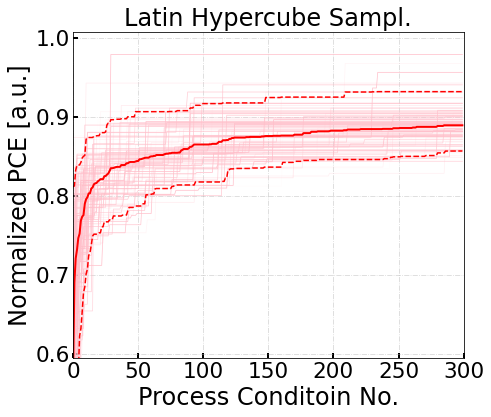

In [293]:
LHS_list = np.transpose(df_LHS_full.values)
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in LHS_list:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc)),eff_max_acc/max_eff, alpha = 0.8*i/len(LHS_list)+0.6, c = 'pink', linewidth=0.75)
    eff_max_runlist.append(eff_max_acc/max_eff)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 95, axis = 0)
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
line_5perc = np.percentile(eff_max_runlist, 5, axis = 0)

ax.plot(line_95perc,'--', c = 'red', linewidth=1.5)
ax.plot(line_median,'-', c = 'red', linewidth=2)
ax.plot(line_5perc,'--', c = 'red', linewidth=1.5)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(10.5/max_eff,17.8/max_eff)
axes.set_xlim(0,300)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE [a.u.]', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
axes.set_title('Latin Hypercube Sampl.', fontsize = fs)
plt.show()

LHS_full_5perc, LHS_full_50perc, LHS_full_95perc= [line_5perc, line_median, line_95perc]

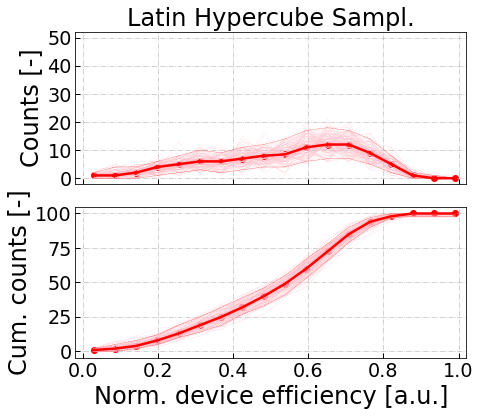

In [427]:
eff_seq_list = LHS_list
cum_list = []
cnt_list = []
effmax_seq_list = []
eff_bins =  np.arange(19)
for seq_i in np.arange(len(eff_seq_list)):
    eff_seq= eff_seq_list[seq_i][:100]
    effmax_seq = np.maximum.accumulate(eff_seq)

    eff_sorted = np.sort(eff_seq)
    cnts, bins = np.histogram(eff_sorted, bins=eff_bins)
    cum_cnts = np.cumsum(cnts)
    x = bins[:-1]+0.5
    y_cnt = cnts#/cum_cnts[-1]
    y_cum = cum_cnts#/cum_cnts[-1]
    cnt_list.append(y_cnt)
    cum_list.append(y_cum)
    effmax_seq_list.append(effmax_seq)
    
effmax_seq_95perc = np.quantile(effmax_seq_list, 0.95, axis = 0)
effmax_seq_5perc = np.quantile(effmax_seq_list, 0.05, axis = 0)
effmax_seq_median = np.median(effmax_seq_list, axis = 0)

distr_95perc = np.quantile(cnt_list, 0.95, axis = 0)
distr_5perc = np.quantile(cnt_list, 0.05, axis = 0)
distr_median= np.median(cnt_list, axis = 0)

cum_distr_95perc = np.quantile(cum_list, 0.95, axis = 0)
cum_distr_5perc = np.quantile(cum_list, 0.05, axis = 0)
cum_distr_median = np.median(cum_list, axis = 0)

LHS_hist100_5perc, LHS_hist100_50perc, LHS_hist100_95perc= [distr_5perc, distr_median, distr_95perc]
LHS_cum100_5perc, LHS_cum100_50perc, LHS_cum100_95perc= [cum_distr_5perc, cum_distr_median, cum_distr_95perc]

x_norm = x/max_eff
fig,axes = plt.subplots(2, 1, figsize=(7, 5*1.2), sharex = True)
fs = 24
ax = axes[0]
for cnt_i in cnt_list:
    ax.plot(x_norm, cnt_i, '--', linewidth = 0.3, alpha = 1*i/len(cnt_list)+0.9, color = 'pink') 

ax.plot(x_norm, distr_median, '-', color = 'red', linewidth = 2.5, label = 'LHS') 
ax.scatter(x_norm, distr_median, color = 'red') 
ax.plot(x_norm, distr_95perc, '--', color = 'red', linewidth = 0.3) 
ax.plot(x_norm, distr_5perc, '--', color = 'red', linewidth = 0.3) 
ax.fill_between(x_norm, distr_5perc, distr_95perc, alpha = 0.1, color = 'pink')
#ax.plot(np.ones(100)*0.95, np.linspace(0,51,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Counts [-]', fontsize = fs)
ax.set_ylim(-0.02*100, 0.52*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)
ax.set_title('Latin Hypercube Sampl.', fontsize = fs)

ax = axes[1]
for cum_i in cum_list:
    ax.plot(x_norm, cum_i, '--', linewidth = 0.3, alpha = 1*i/len(cum_list)+0.9, color = 'pink') 

ax.plot(x_norm, cum_distr_median, '-', color = 'red', linewidth = 2.5, label = 'LHS')
ax.scatter(x_norm, cum_distr_median, color = 'red') 
ax.plot(x_norm, cum_distr_95perc, '--', color = 'red', linewidth = 0.3) 
ax.plot(x_norm, cum_distr_5perc, '--', color = 'red', linewidth = 0.3) 
ax.fill_between(x_norm, cum_distr_5perc, cum_distr_95perc, alpha = 0.1, color = 'pink')
#ax.plot(np.ones(100)*15/norm_factor, np.linspace(0, 2,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Cum. counts [-]', fontsize = fs)
ax.set_xlabel('Norm. device efficiency [a.u.]', fontsize = fs)
ax.set_yticks(np.arange(6)*25)
ax.set_ylim(-0.05*100, 1.05*100)
ax.set_xlim(-0.02, 1.02)
#ax.legend(bbox_to_anchor=(0.08, 1.2, 0.5, 0.9), fontsize = fs*0.8)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.7)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.15)
plt.show()


### Factorial Sampling with Progressive Grid Subdivision (FS-PGS) - Benchmark Runs 

In [295]:
df = pd.read_excel("Iter_pGrid_benchmark_20210701.xls")
df_pGrid_iter = df.iloc[:,1:]
df_pGrid_iter

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,9.28,5.47,8.24,10.00,8.07,8.56,10.86,6.78,10.00,1.82,...,0.87,9.28,10.00,-0.77,2.59,3.23,6.78,8.07,5.40,7.77
1,7.77,2.34,2.75,9.34,10.38,8.24,9.34,5.40,8.66,7.42,...,7.72,8.56,5.40,2.75,7.72,10.02,6.70,1.86,7.86,3.22
2,8.24,10.00,0.94,11.00,10.86,9.42,6.25,8.66,4.24,8.88,...,0.73,10.38,-1.11,3.37,8.07,6.92,9.48,7.72,10.00,2.59
3,9.34,9.48,10.81,5.72,7.18,10.81,8.66,10.00,2.34,2.95,...,8.66,4.86,0.94,8.66,10.67,2.95,1.82,4.36,10.15,4.84
4,0.87,-0.77,3.48,7.86,8.66,0.73,0.73,9.54,4.36,6.92,...,10.00,3.48,2.97,2.34,8.24,8.24,6.92,9.42,7.42,9.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,17.59,17.52,17.60,17.54,17.35,17.52,17.35,17.52,17.60,17.52,...,17.35,17.53,16.95,17.52,16.94,17.09,16.78,17.10,16.93,17.10
375,17.59,17.11,16.95,17.09,17.61,17.09,17.62,17.09,17.62,17.10,...,16.93,17.53,16.93,17.11,17.36,17.10,17.62,17.09,17.35,17.11
376,17.35,17.08,16.93,17.52,17.36,17.52,16.78,17.11,17.36,17.52,...,16.77,17.11,16.94,17.09,17.35,17.53,16.93,17.11,16.77,17.52
377,17.37,17.10,16.77,17.10,16.93,17.10,17.59,17.54,16.94,17.54,...,17.37,17.52,16.77,17.09,17.35,17.54,17.35,17.08,16.93,17.52


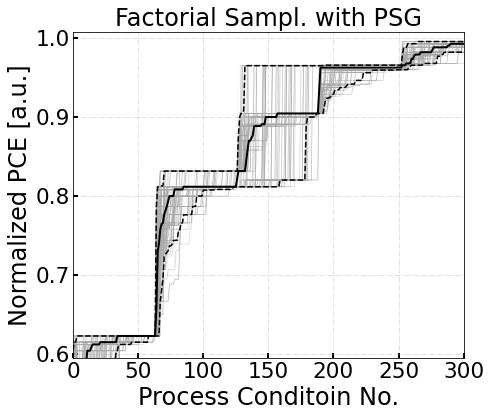

In [356]:
pGrid_list = np.transpose(df_pGrid_iter.values)
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in pGrid_list:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc)),eff_max_acc/max_eff, alpha = 0.8*i/len(pGrid_list)+0.4, c = 'darkgray', linewidth=0.75)
    eff_max_runlist.append(eff_max_acc/max_eff)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 95, axis = 0)
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
line_5perc = np.percentile(eff_max_runlist, 5, axis = 0)

ax.plot(line_95perc,'--', c = 'black', linewidth=1.5)
ax.plot(line_5perc,'--', c = 'black', linewidth=1.5)
ax.plot(line_median,'-', c = 'black', linewidth=2)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(10.5/max_eff,17.8/max_eff)
axes.set_xlim(0,300)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE [a.u.]', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
axes.set_title('Factorial Sampl. with PSG', fontsize = fs)
plt.show()

pGrid_5perc, pGrid_50perc, pGrid_95perc= [line_5perc, line_median, line_95perc]

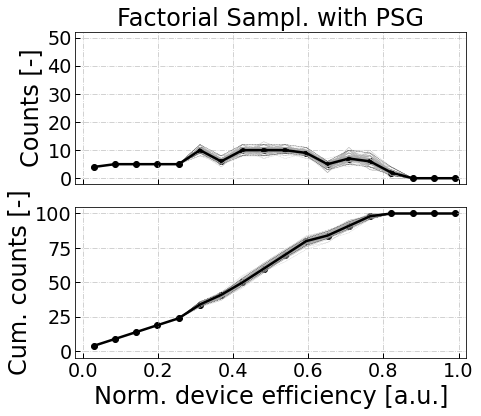

In [416]:
eff_seq_list = pGrid_list
cum_list = []
cnt_list = []
effmax_seq_list = []
eff_bins =  np.arange(19)
for seq_i in np.arange(len(eff_seq_list)):
    eff_seq= eff_seq_list[seq_i][:100]
    effmax_seq = np.maximum.accumulate(eff_seq)
    eff_sorted = np.sort(abs(eff_seq))
    cnts, bins = np.histogram(eff_sorted, bins=eff_bins)
    cum_cnts = np.cumsum(cnts)
    x = bins[:-1]+0.5
    y_cnt = cnts#/cum_cnts[-1]
    y_cum = cum_cnts#/cum_cnts[-1]
    cnt_list.append(y_cnt)
    cum_list.append(y_cum)
    effmax_seq_list.append(effmax_seq)
    
effmax_seq_95perc = np.quantile(effmax_seq_list, 0.95, axis = 0)
effmax_seq_5perc = np.quantile(effmax_seq_list, 0.05, axis = 0)
effmax_seq_median = np.median(effmax_seq_list, axis = 0)

distr_95perc = np.quantile(cnt_list, 0.95, axis = 0)
distr_5perc = np.quantile(cnt_list, 0.05, axis = 0)
distr_median= np.median(cnt_list, axis = 0)

cum_distr_95perc = np.quantile(cum_list, 0.95, axis = 0)
cum_distr_5perc = np.quantile(cum_list, 0.05, axis = 0)
cum_distr_median = np.median(cum_list, axis = 0)

pGrid_hist100_5perc, pGrid_hist100_50perc, pGrid_hist100_95perc= [distr_5perc, distr_median, distr_95perc]
pGrid_cum100_5perc, pGrid_cum100_50perc, pGrid_cum100_95perc= [cum_distr_5perc, cum_distr_median, cum_distr_95perc]
x_norm = x/max_eff
fig,axes = plt.subplots(2, 1, figsize=(7, 5*1.2), sharex = True)
fs = 24
ax = axes[0]
for cnt_i in cnt_list:
    ax.plot(x_norm, cnt_i, '--', linewidth = 0.3, alpha = 1*i/len(cnt_list)+0.9, color = 'darkgray') 
ax.plot(x_norm, distr_median, '-', color = 'black', linewidth = 2.5, label = 'Fact. Sampl. w. PSG') 
ax.scatter(x_norm, distr_median, color = 'black') 
ax.plot(x_norm, distr_95perc, '--', color = 'black', linewidth = 0.3) 
ax.plot(x_norm, distr_5perc, '--', color = 'black', linewidth = 0.3) 
ax.fill_between(x_norm, distr_5perc, distr_95perc, alpha = 0.1, color = 'darkgray')
#ax.plot(np.ones(100)*0.95, np.linspace(0,51,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Counts [-]', fontsize = fs)
ax.set_ylim(-0.02*100, 0.52*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)
ax.set_title('Factorial Sampl. with PSG', fontsize = fs)

ax = axes[1]
for cum_i in cum_list:
    ax.plot(x_norm, cum_i, '--', linewidth = 0.3, alpha = 1*i/len(cum_list)+0.9, color = 'darkgray') 

ax.plot(x_norm, cum_distr_median, '-', color = 'black', linewidth = 2.5, label = 'Fact. Sampl. w. PSG')
ax.scatter(x_norm, cum_distr_median, color = 'black') 
ax.plot(x_norm, cum_distr_95perc, '--', color = 'black', linewidth = 0.3) 
ax.plot(x_norm, cum_distr_5perc, '--', color = 'black', linewidth = 0.3) 
ax.fill_between(x_norm, cum_distr_5perc, cum_distr_95perc, alpha = 0.1, color = 'darkgray')
#ax.plot(np.ones(100)*15/norm_factor, np.linspace(0, 2,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Cum. counts [-]', fontsize = fs)
ax.set_xlabel('Norm. device efficiency [a.u.]', fontsize = fs)
ax.set_yticks(np.arange(6)*25)
ax.set_ylim(-0.05*100, 1.05*100)
ax.set_xlim(-0.02, 1.02)
#ax.legend(bbox_to_anchor=(0.35, 1.2, 0.5, 0.9), fontsize = fs*0.8)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.7)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.15)
plt.show()


### One Variable At a Time - Benchmark Runs

In [365]:
df = pd.read_excel("OneVarAtTime_list_benckmark_20210701.xls")
df_OVAT_iter = df.iloc[:,1:]
df_OVAT_iter

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,7.76,6.75,10.85,14.85,14.41,2.76,6.93,3.97,1.70,13.69,...,12.02,7.40,10.70,11.93,11.73,9.76,4.65,11.00,13.11,8.26
1,7.91,6.76,11.19,14.59,13.99,2.76,7.20,3.97,1.70,13.40,...,12.03,7.42,10.70,11.66,11.38,9.55,4.85,11.01,13.11,8.26
2,7.75,7.28,11.33,14.84,13.91,4.71,6.78,5.12,3.27,13.50,...,12.56,7.81,11.51,11.50,11.36,10.68,5.81,11.43,13.92,9.28
3,7.93,7.29,11.34,14.56,13.31,4.66,6.70,5.12,3.27,13.20,...,12.56,7.81,11.51,11.68,11.24,10.72,6.47,11.43,13.86,9.28
4,6.57,7.73,11.54,14.56,13.31,3.47,6.99,5.18,3.29,13.20,...,12.55,7.81,11.58,11.68,11.22,10.82,6.50,11.42,13.27,9.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,13.45,15.89,15.02,15.78,14.85,14.17,17.05,14.76,16.96,14.43,...,16.78,17.53,15.06,17.05,15.66,15.66,16.79,16.81,17.48,17.59
296,13.49,15.88,17.37,15.79,14.74,14.26,16.82,14.79,17.02,14.43,...,16.47,17.42,15.06,17.60,14.43,15.66,17.60,15.06,16.45,17.60
297,13.43,15.87,17.60,14.87,14.72,16.10,16.81,10.95,17.03,14.42,...,16.69,17.49,15.04,17.59,14.43,14.43,17.53,15.06,16.45,17.38
298,13.41,17.27,16.79,14.52,14.46,16.10,15.06,10.95,17.59,14.84,...,16.69,10.95,15.37,15.66,14.42,14.43,17.42,15.04,16.95,17.04


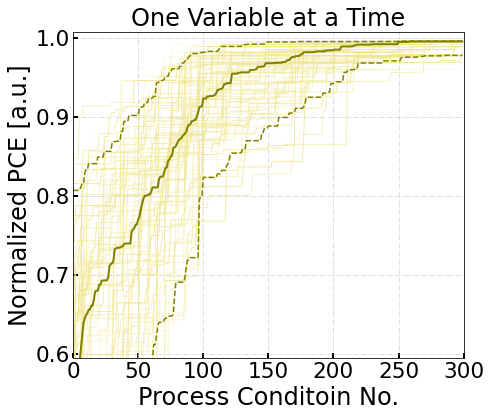

In [366]:
OVAT_list = np.transpose(df_OVAT_iter.values)
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in OVAT_list:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc)),eff_max_acc/max_eff, alpha = 1*i/len(OVAT_list)+0.9, c = 'khaki', linewidth=0.75)
    eff_max_runlist.append(eff_max_acc/max_eff)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 95, axis = 0)
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
line_5perc = np.percentile(eff_max_runlist, 5, axis = 0)

ax.plot(line_95perc,'--', c = 'olive', linewidth=1.5)
ax.plot(line_5perc,'--', c = 'olive', linewidth=1.5)
ax.plot(line_median,'-', c = 'olive', linewidth=2)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(10.5/max_eff,17.8/max_eff)
axes.set_xlim(0,300)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE [a.u.]', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
axes.set_title('One Variable at a Time', fontsize = fs)
plt.show()

OVAT_5perc, OVAT_50perc, OVAT_95perc= [line_5perc, line_median, line_95perc]

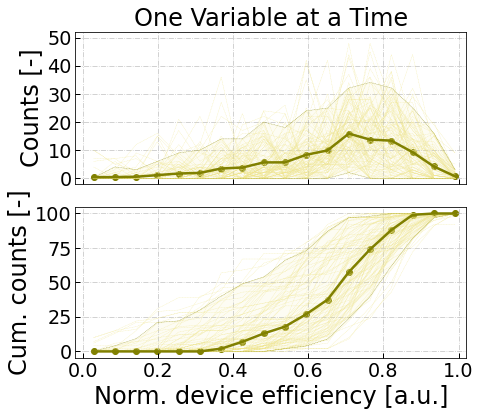

In [413]:
eff_seq_list = OVAT_list
cum_list = []
cnt_list = []
effmax_seq_list = []
eff_bins =  np.arange(19)
for seq_i in np.arange(len(eff_seq_list)):
    eff_seq= eff_seq_list[seq_i][:100]
    effmax_seq = np.maximum.accumulate(eff_seq)

    eff_sorted = np.sort(eff_seq)
    cnts, bins = np.histogram(eff_sorted, bins=eff_bins)
    cum_cnts = np.cumsum(cnts)
    x = bins[:-1]+0.5
    y_cnt = cnts#/cum_cnts[-1]
    y_cum = cum_cnts#/cum_cnts[-1]
    cnt_list.append(y_cnt)
    cum_list.append(y_cum)
    effmax_seq_list.append(effmax_seq)
    
effmax_seq_95perc = np.quantile(effmax_seq_list, 0.95, axis = 0)
effmax_seq_5perc = np.quantile(effmax_seq_list, 0.05, axis = 0)
effmax_seq_median = np.quantile(effmax_seq_list, 0.5, axis = 0)

distr_95perc = np.quantile(cnt_list, 0.95, axis = 0)
distr_5perc = np.quantile(cnt_list, 0.05, axis = 0)
distr_median= np.quantile(cnt_list, 0.5, axis = 0)
distr_median= np.mean(cnt_list, axis = 0)

cum_distr_95perc = np.quantile(cum_list, 0.95, axis = 0)
cum_distr_5perc = np.quantile(cum_list, 0.05, axis = 0)
cum_distr_median = np.quantile(cum_list, 0.5, axis = 0)

OVAT_hist100_5perc, OVAT_hist100_50perc, OVAT_hist100_95perc= [distr_5perc, distr_median, distr_95perc]
OVAT_cum100_5perc, OVAT_cum100_50perc, OVAT_cum100_95perc= [cum_distr_5perc, cum_distr_median, cum_distr_95perc]

x_norm = x/max_eff
fig,axes = plt.subplots(2, 1, figsize=(7, 5*1.2), sharex = True)
fs = 24
ax = axes[0]
for cnt_i in cnt_list:
    ax.plot(x_norm, cnt_i, '--', linewidth = 0.3, alpha = 1*i/len(cnt_list)+0.9, color = 'khaki') 

ax.plot(x_norm, distr_median, '-', color = 'olive', linewidth = 2.5, label = 'OVAT') 
ax.scatter(x_norm, distr_median, color = 'olive') 
ax.plot(x_norm, distr_95perc, '--', color = 'olive', linewidth = 0.3) 
ax.plot(x_norm, distr_5perc, '--', color = 'olive', linewidth = 0.3) 
ax.fill_between(x_norm, distr_5perc, distr_95perc, alpha = 0.1, color = 'khaki')


#ax.plot(np.ones(100)*0.95, np.linspace(0,51,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Counts [-]', fontsize = fs)
ax.set_ylim(-0.02*100, 0.52*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)
ax.set_title('One Variable at a Time', fontsize = fs)

ax = axes[1]
for cum_i in cum_list:
    ax.plot(x_norm, cum_i, '--', linewidth = 0.3, alpha = 1*i/len(cum_list)+0.9, color = 'khaki') 

ax.plot(x_norm, cum_distr_median, '-', color = 'olive', linewidth = 2.5, label = 'OVAT')
ax.scatter(x_norm, cum_distr_median, color = 'olive') 
ax.plot(x_norm, cum_distr_95perc, '--', color = 'olive', linewidth = 0.3) 
ax.plot(x_norm, cum_distr_5perc, '--', color = 'olive', linewidth = 0.3) 
ax.fill_between(x_norm, cum_distr_5perc, cum_distr_95perc, alpha = 0.1, color = 'khaki')
#ax.plot(np.ones(100)*15/norm_factor, np.linspace(0, 2,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Cum. counts [-]', fontsize = fs)
ax.set_xlabel('Norm. device efficiency [a.u.]', fontsize = fs)
ax.set_yticks(np.arange(6)*25)
ax.set_ylim(-0.05*100, 1.05*100)
ax.set_xlim(-0.02, 1.02)
#ax.legend(bbox_to_anchor=(0.05, 1.2, 0.5, 0.9), fontsize = fs*0.8)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.7)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.15)
plt.show()

### The Combined Plot

##### Maximum PCE at a given number of process conditions

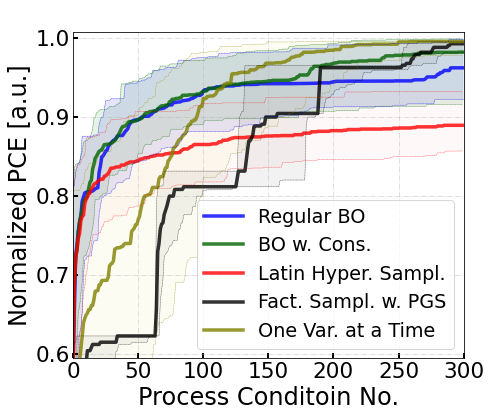

In [396]:
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes

ax.plot(BO_reg_50perc,'-', c = 'blue', linewidth=3.5,alpha = 0.8)
ax.plot(BO_wInitCons_50perc,'-', c = 'darkgreen', linewidth=3.5,alpha = 0.8)
ax.plot(LHS_full_50perc,'-', c = 'red', linewidth=3.5,alpha = 0.8)
ax.plot(pGrid_50perc,'-', c = 'black', linewidth=3.5,alpha = 0.8)
ax.plot(OVAT_50perc,'-', c = 'olive', linewidth=3.5,alpha = 0.8)


ax.fill_between(np.arange(len(BO_reg_5perc)), BO_reg_5perc, BO_reg_95perc, alpha = 0.1, color = 'blue')
ax.plot(BO_reg_5perc,'--', c = 'blue', linewidth=0.3)
ax.plot(BO_reg_95perc,'--', c = 'blue', linewidth=0.3)

ax.fill_between(np.arange(len(BO_wInitCons_5perc)), BO_wInitCons_5perc, BO_wInitCons_95perc, alpha = 0.1, color = 'green')
ax.plot(BO_wInitCons_5perc,'--', c = 'darkgreen', linewidth=0.3)
ax.plot(BO_wInitCons_95perc,'--', c = 'darkgreen', linewidth=0.3)

ax.fill_between(np.arange(len(LHS_full_5perc)), LHS_full_5perc, LHS_full_95perc, alpha = 0.1, color = 'pink')
ax.plot(LHS_full_5perc,'--', c = 'red', linewidth=0.3)
ax.plot(LHS_full_95perc,'--', c = 'red', linewidth=0.3)

ax.fill_between(np.arange(len(pGrid_5perc)), pGrid_5perc, pGrid_95perc, alpha = 0.1, color = 'gray')
ax.plot(pGrid_5perc,'--', c = 'black', linewidth=0.3)
ax.plot(pGrid_95perc,'--', c = 'black', linewidth=0.3)

ax.fill_between(np.arange(len(OVAT_5perc)), OVAT_5perc, OVAT_95perc, alpha = 0.1, color = 'khaki')
ax.plot(OVAT_5perc,'--', c = 'olive', linewidth=0.3)
ax.plot(OVAT_95perc,'--', c = 'olive', linewidth=0.3)




axes.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(10.5/max_eff,17.8/max_eff)
axes.set_xlim(0,300)
axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE [a.u.]', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
axes.set_title(' ', fontsize = fs)
axes.legend(['Regular BO',
             'BO w. Cons.', 
             'Latin Hyper. Sampl.', 
             'Fact. Sampl. w. PGS',
             'One Var. at a Time'
            ],loc='lower right',fontsize = fs*0.8)
plt.show()


##### PCE distribution in the first 100 samples

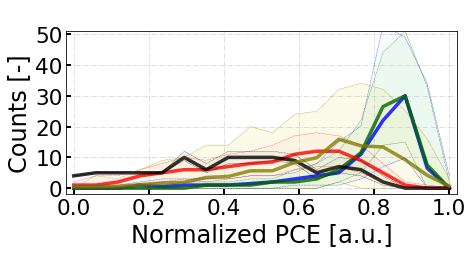

In [429]:

fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 3), sharex = True)
ax = axes
norm_eff = (x_norm-min(x_norm))/(max(x_norm)-min(x_norm))

ax.plot(norm_eff, BO_hist100_50perc, '-', color = 'blue', linewidth = 3.5, alpha = 0.8, label = 'Regular BO') 
ax.plot(norm_eff, BOwCons_hist100_50perc, '-', color = 'darkgreen', linewidth = 3.5,  alpha = 0.8, label = 'BO w. Cons.') 
ax.plot(norm_eff, LHS_hist100_50perc, '-', color = 'red', linewidth = 3.5,  alpha = 0.8, label = 'Latin Hyper. Sampl.') 
ax.plot(norm_eff, pGrid_hist100_50perc, '-', color = 'black', linewidth = 3.5,  alpha = 0.8, label = 'Fact. Sampl. w. PGS') 
ax.plot(norm_eff, OVAT_hist100_50perc, '-', color = 'olive', linewidth = 3.5,  alpha = 0.8, label = 'One Var. at a Time') 


#ax.scatter(x_norm, distr_median, color = 'olive') 
ax.fill_between(norm_eff, BO_hist100_5perc, BO_hist100_95perc, alpha = 0.1, color = 'lightblue')
ax.plot(norm_eff, BO_hist100_95perc, '--', color = 'blue', linewidth=0.3) 
ax.plot(norm_eff, BO_hist100_5perc, '--', color = 'blue', linewidth=0.3) 


ax.fill_between(norm_eff, BOwCons_hist100_5perc, BOwCons_hist100_95perc, alpha = 0.1, color = 'lightgreen')
ax.plot(norm_eff, BOwCons_hist100_95perc, '--', color = 'darkgreen', linewidth=0.3) 
ax.plot(norm_eff, BOwCons_hist100_5perc, '--', color = 'darkgreen', linewidth=0.3) 

ax.fill_between(norm_eff, LHS_hist100_5perc, LHS_hist100_95perc, alpha = 0.1, color = 'pink')
ax.plot(norm_eff, LHS_hist100_95perc, '--', color = 'red', linewidth=0.3) 
ax.plot(norm_eff, LHS_hist100_5perc, '--', color = 'red', linewidth=0.3) 


ax.fill_between(norm_eff, pGrid_hist100_5perc, pGrid_hist100_95perc, alpha = 0.1, color = 'darkgray')
ax.plot(norm_eff, pGrid_hist100_95perc, '--', color = 'black', linewidth=0.3) 
ax.plot(norm_eff, pGrid_hist100_5perc, '--', color = 'black', linewidth=0.3) 

ax.fill_between(norm_eff, OVAT_hist100_5perc, OVAT_hist100_95perc, alpha = 0.2, color = 'khaki')
ax.plot(norm_eff, OVAT_hist100_95perc, '--', color = 'olive', linewidth=0.3) 
ax.plot(norm_eff, OVAT_hist100_5perc, '--', color = 'olive', linewidth=0.3) 



ax.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
#ax.set_ylim(10.5/max_eff,17.8/max_eff)
#ax.set_xlim(0,300)
ax.grid(True, linestyle='-.')
ax.set_xlabel('Normalized PCE [a.u.]', fontsize = fs)
ax.set_ylabel('Counts [-]', fontsize = fs)
ax.set_ylim(-0.02*100, 0.51*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)

ax.set_title(' ', fontsize = fs)
# ax.legend(['Regular BO',
#              'BO w. Cons.', 
#              'Latin Hyper. Sampl.', 
#              'Fact. Sampl. w. PGS',
#              'One Var. at a Time'
#             ],loc='upper left',fontsize = fs*0.7)
plt.show()


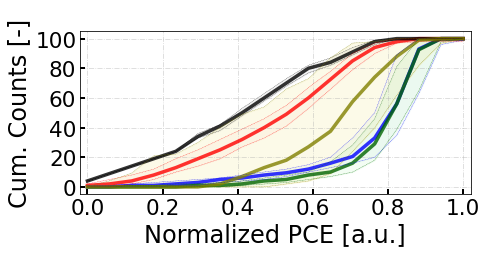

In [428]:

fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 3), sharex = True)
ax = axes
norm_eff = (x_norm-min(x_norm))/(max(x_norm)-min(x_norm))

ax.plot(norm_eff, BO_cum100_50perc, '-', color = 'blue', linewidth = 3.5, alpha = 0.8, label = 'Regular BO') 
ax.plot(norm_eff, BOwCons_cum100_50perc, '-', color = 'darkgreen', linewidth = 3.5,  alpha = 0.8, label = 'BO w. Cons.') 
ax.plot(norm_eff, LHS_cum100_50perc, '-', color = 'red', linewidth = 3.5,  alpha = 0.8, label = 'Latin Hyper. Sampl.') 
ax.plot(norm_eff, pGrid_cum100_50perc, '-', color = 'black', linewidth = 3.5,  alpha = 0.8, label = 'Fact. Sampl. w. PGS') 
ax.plot(norm_eff, OVAT_cum100_50perc, '-', color = 'olive', linewidth = 3.5,  alpha = 0.8, label = 'One Var. at a Time') 


#ax.scatter(x_norm, distr_median, color = 'olive') 
ax.fill_between(norm_eff, BO_cum100_5perc, BO_cum100_95perc, alpha = 0.1, color = 'lightblue')
ax.plot(norm_eff, BO_cum100_95perc, '--', color = 'blue', linewidth=0.3) 
ax.plot(norm_eff, BO_cum100_5perc, '--', color = 'blue', linewidth=0.3) 


ax.fill_between(norm_eff, BOwCons_cum100_5perc, BOwCons_cum100_95perc, alpha = 0.1, color = 'lightgreen')
ax.plot(norm_eff, BOwCons_cum100_95perc, '--', color = 'darkgreen', linewidth=0.3) 
ax.plot(norm_eff, BOwCons_cum100_5perc, '--', color = 'darkgreen', linewidth=0.3) 

ax.fill_between(norm_eff, LHS_cum100_5perc, LHS_cum100_95perc, alpha = 0.1, color = 'pink')
ax.plot(norm_eff, LHS_cum100_95perc, '--', color = 'red', linewidth=0.3) 
ax.plot(norm_eff, LHS_cum100_5perc, '--', color = 'red', linewidth=0.3) 


ax.fill_between(norm_eff, pGrid_cum100_5perc, pGrid_cum100_95perc, alpha = 0.1, color = 'darkgray')
ax.plot(norm_eff, pGrid_cum100_95perc, '--', color = 'black', linewidth=0.3) 
ax.plot(norm_eff, pGrid_cum100_5perc, '--', color = 'black', linewidth=0.3) 

ax.fill_between(norm_eff, OVAT_cum100_5perc, OVAT_cum100_95perc, alpha = 0.2, color = 'khaki')
ax.plot(norm_eff, OVAT_cum100_95perc, '--', color = 'olive', linewidth=0.3) 
ax.plot(norm_eff, OVAT_cum100_5perc, '--', color = 'olive', linewidth=0.3) 



ax.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
#ax.set_ylim(10.5/max_eff,17.8/max_eff)
#ax.set_xlim(0,300)
ax.grid(True, linestyle='-.')
ax.set_xlabel('Normalized PCE [a.u.]', fontsize = fs)
ax.set_ylabel('Cum. Counts [-]', fontsize = fs)
ax.set_ylim(-.05*100, 1.05*100)
ax.set_yticks(np.arange(6)*20)
ax.set_xlim(-0.02, 1.02)

ax.set_title(' ', fontsize = fs)
# ax.legend(['Regular BO',
#              'BO w. Cons.', 
#              'Latin Hyper. Sampl.', 
#              'Fact. Sampl. w. PGS',
#              'One Var. at a Time'
#             ],loc='upper left',fontsize = fs*0.7)
plt.show()
